# Business Problem Statement
- Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# EDA Preprocessing

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data set folder/bank-full.csv", sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


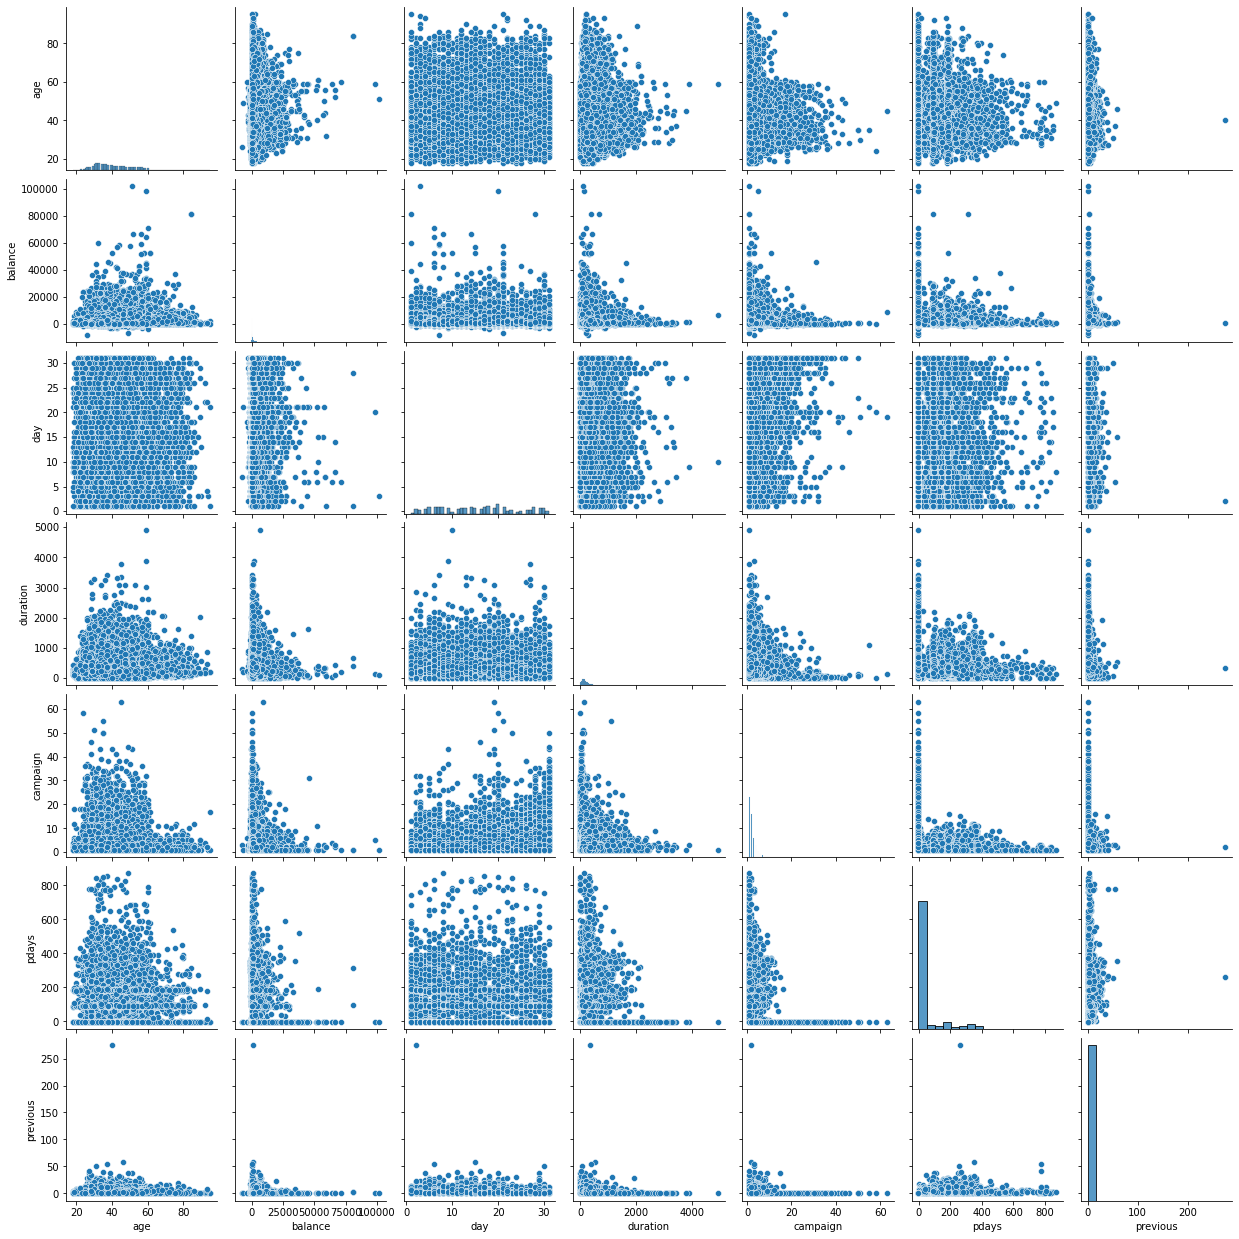

In [7]:
sns.pairplot(data)

# Checking normality of data

In [8]:
sns.set_style(style='darkgrid')

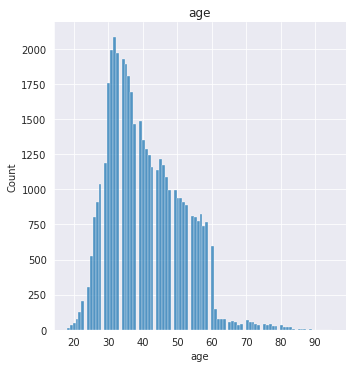

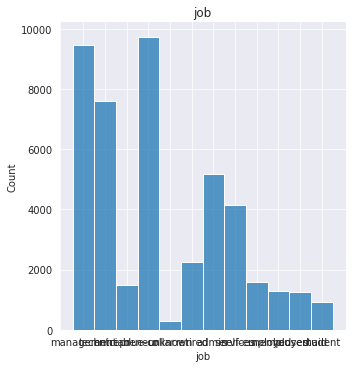

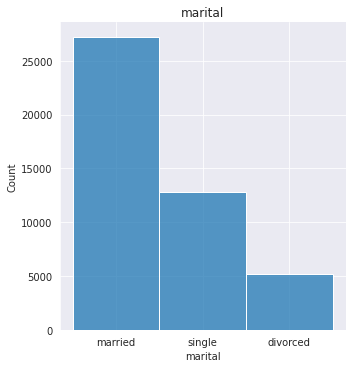

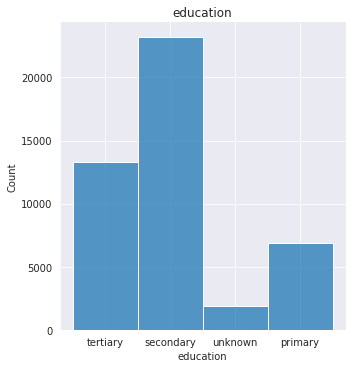

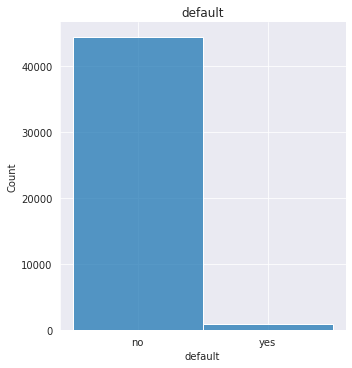

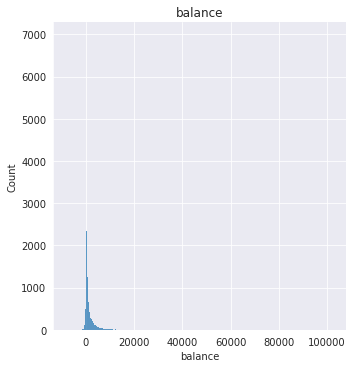

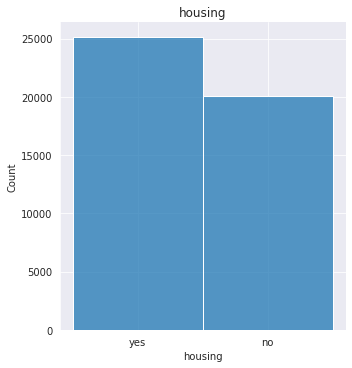

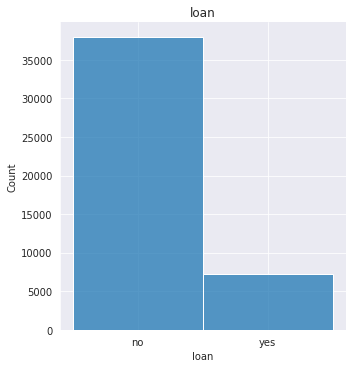

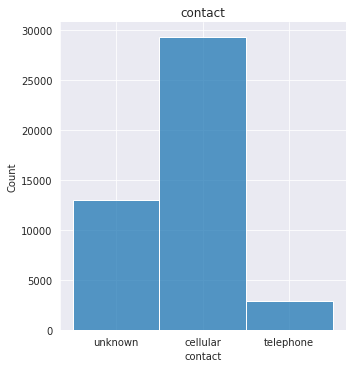

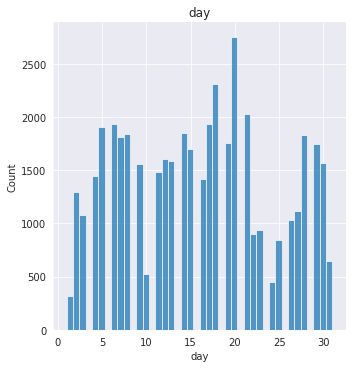

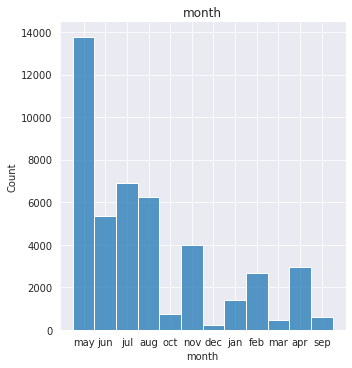

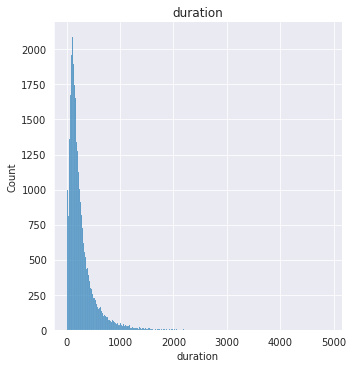

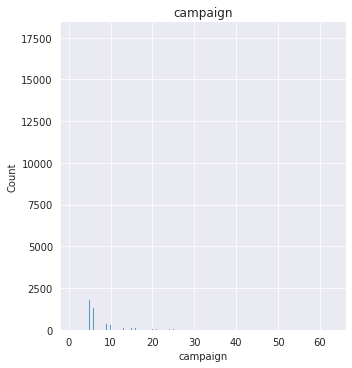

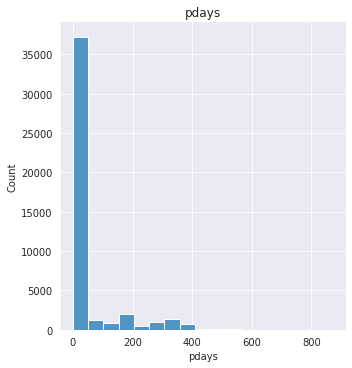

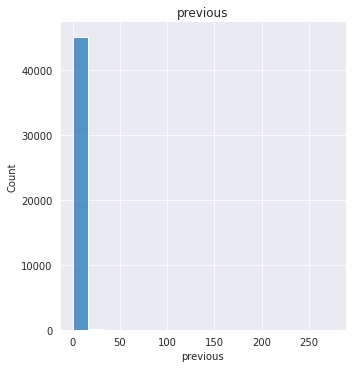

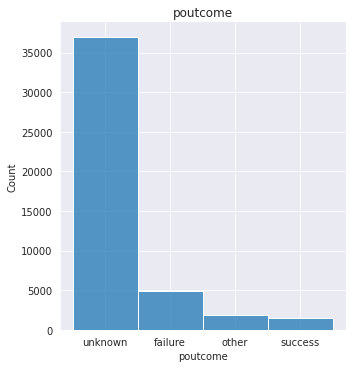

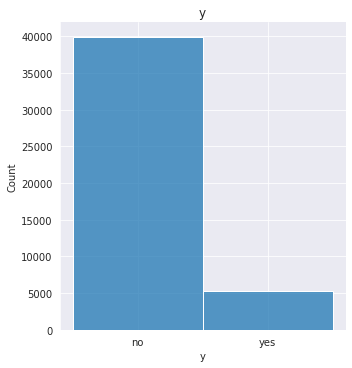

In [9]:
for i in data:
  sns.displot(data[i])
  plt.title(i)
  plt.show()

> **Observation** all the data variables are not normaly distributed
-  So, we have to more focus on F1 Score while building the model

# Useing One Hot encoding on categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le = LabelEncoder()
data=data.apply(le.fit_transform)
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


# Distriduting input and output variable to buidl model

In [12]:
X = data.iloc[:,:16]
Y = data["y"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

# Building the model

In [13]:
classifer = LogisticRegression()
classifer.fit(X,Y)

LogisticRegression()

In [14]:
classifer.classes_

array([0, 1])

In [15]:
classifer.intercept_

array([-0.13648882])

In [16]:
classifer.coef_

array([[-1.74391296e-02,  1.85527248e-02, -1.61165320e-01,
        -6.94983647e-02, -7.01865500e-03,  1.97344458e-05,
        -2.29183915e-01, -7.19464094e-02, -2.26371608e-01,
        -2.94819354e-02, -1.03358285e-01,  3.71790954e-03,
        -2.94198230e-01, -2.90443011e-03,  1.58161592e-01,
        -3.64441744e-01]])

In [17]:
y_pred = classifer.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
classifer.predict_proba(X)

array([[0.93989998, 0.06010002],
       [0.95048768, 0.04951232],
       [0.95618392, 0.04381608],
       ...,
       [0.5788593 , 0.4211407 ],
       [0.93778914, 0.06221086],
       [0.52566898, 0.47433102]])

In [24]:
y_pred_df=pd.DataFrame({"actual":Y, "Predicted_pro":y_pred})
y_pred_df

,actual,Predicted_pro
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [19]:
from sklearn.metrics import plot_confusion_matrix

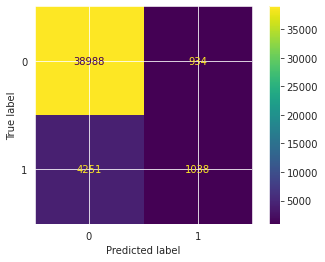

In [20]:
plot_confusion_matrix(classifer,X,Y)
plt.show()

**Our output data is imbalance**

# Report

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.53      0.20      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.71      0.59      0.61     45211
weighted avg       0.86      0.89      0.86     45211



In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

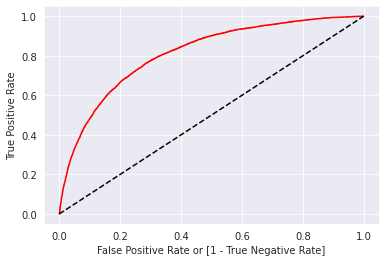

In [27]:
fpr, tpr, thresholds = roc_curve(Y, classifer.predict_proba(X)[:,1])

auc = roc_auc_score(Y,y_pred)

plt.plot(fpr,tpr, color='red', label='logit model ( area = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [28]:
auc

0.5864303798533061

# Conclusion 
> Our output data is imbalance.
- F1-Scor = 0.86
- As per confusion_matrix most of the values foles under **0** which is **'True Negative'** == 38988. That means 86% of people has not subscribed a term deposit